In [ ]:
def analisis_univariado(df,variable):
    print(f'Variable: {variable}')
    print(df[variable].describe())
    print(f'Missing Values: {df[variable].isnull().sum()}')
    print(f'Unique Values: {df[variable].nunique()}')
    print(df[variable].value_counts())

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, normaltest

class UnivariateAnalysis:
    def __init__(self, data):
        """
        Inicializa la clase con un DataFrame de pandas.
        
        Parameters:
        data (pd.DataFrame): El DataFrame con los datos para análisis.
        """
        if not isinstance(data, pd.DataFrame):
            raise ValueError("El argumento 'data' debe ser un DataFrame de pandas.")
        self.data = data
    
    def describe_variable(self, column):
        """
        Genera estadísticas descriptivas básicas para una columna.
        
        Parameters:
        column (str): Nombre de la columna para analizar.
        
        Returns:
        dict: Diccionario con estadísticas descriptivas.
        """
        if column not in self.data.columns:
            raise ValueError(f"La columna '{column}' no está en el DataFrame.")
        
        stats = self.data[column].describe().to_dict()
        stats['skewness'] = self.data[column].skew()
        stats['kurtosis'] = self.data[column].kurt()
        return stats
    
    def plot_distribution(self, column, bins=30, kde=True):
        """
        Genera un histograma con la opción de una curva de densidad.
        
        Parameters:
        column (str): Nombre de la columna para analizar.
        bins (int): Número de bins para el histograma.
        kde (bool): Si True, añade una curva de densidad.
        """
        if column not in self.data.columns:
            raise ValueError(f"La columna '{column}' no está en el DataFrame.")
        
        sns.histplot(self.data[column], bins=bins, kde=kde, color='blue', alpha=0.7)
        plt.title(f'Distribución de {column}')
        plt.xlabel(column)
        plt.ylabel('Frecuencia')
        plt.show()
    
    def plot_boxplot(self, column):
        """
        Genera un boxplot para la columna.
        
        Parameters:
        column (str): Nombre de la columna para analizar.
        """
        if column not in self.data.columns:
            raise ValueError(f"La columna '{column}' no está en el DataFrame.")
        
        sns.boxplot(x=self.data[column], color='skyblue')
        plt.title(f'Boxplot de {column}')
        plt.xlabel(column)
        plt.show()
    
    def test_normality(self, column, method='shapiro'):
        """
        Realiza un test de normalidad para la columna.
        
        Parameters:
        column (str): Nombre de la columna para analizar.
        method (str): Método a usar ('shapiro' o 'dagostino').
        
        Returns:
        dict: Resultado del test con estadístico y p-valor.
        """
        if column not in self.data.columns:
            raise ValueError(f"La columna '{column}' no está en el DataFrame.")
        
        if method == 'shapiro':
            stat, p_value = shapiro(self.data[column].dropna())
        elif method == 'dagostino':
            stat, p_value = normaltest(self.data[column].dropna())
        else:
            raise ValueError("Método no válido. Use 'shapiro' o 'dagostino'.")
        
        return {'statistic': stat, 'p_value': p_value, 'normal': p_value > 0.05}
    
    def detect_outliers(self, column, method='iqr', threshold=1.5):
        """
        Detecta outliers en una columna utilizando el método del IQR o Z-Score.
        
        Parameters:
        column (str): Nombre de la columna para analizar.
        method (str): Método a usar ('iqr' o 'zscore').
        threshold (float): Umbral para definir outliers (por defecto 1.5 para IQR).
        
        Returns:
        pd.Series: Máscara booleana indicando los outliers.
        """
        if column not in self.data.columns:
            raise ValueError(f"La columna '{column}' no está en el DataFrame.")
        
        if method == 'iqr':
            Q1 = self.data[column].quantile(0.25)
            Q3 = self.data[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            return (self.data[column] < lower_bound) | (self.data[column] > upper_bound)
        elif method == 'zscore':
            z_scores = (self.data[column] - self.data[column].mean()) / self.data[column].std()
            return np.abs(z_scores) > threshold
        else:
            raise ValueError("Método no válido. Use 'iqr' o 'zscore'.")


{'count': 100.0, 'mean': 0.05598077032453666, 'std': 0.9370960413418546, 'min': -2.1548069298066523, '25%': -0.5259647032121604, '50%': 0.09282660557087818, '75%': 0.5372079947931748, 'max': 2.3607785941875474, 'skewness': np.float64(0.08535813961045303), 'kurtosis': np.float64(0.2556172492005344)}


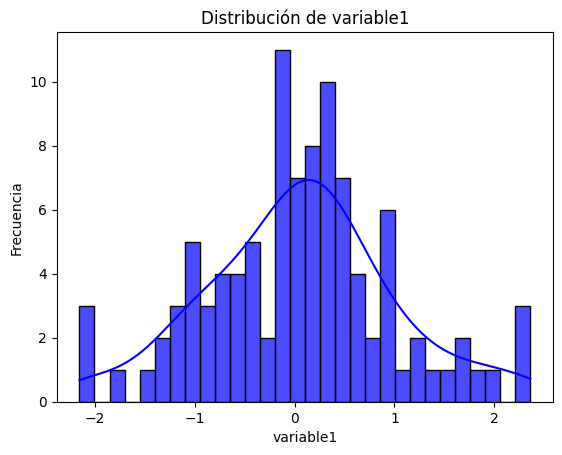

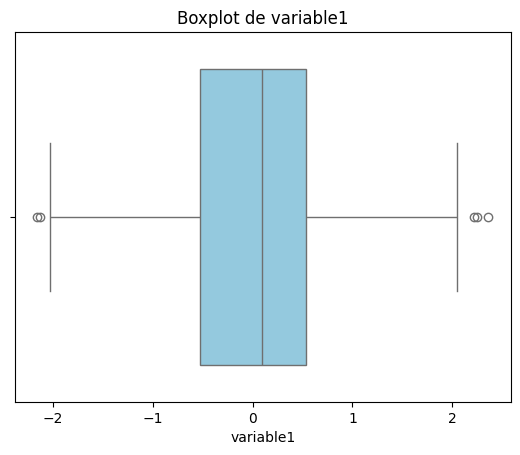

{'statistic': np.float64(0.9862107535112986), 'p_value': np.float64(0.3867724994363131), 'normal': np.True_}
Número de outliers: 5


In [2]:
# Crear un DataFrame de ejemplo
data = pd.DataFrame({
    'variable1': np.random.normal(0, 1, 100),
    'variable2': np.random.exponential(1, 100)
})

# Instanciar la clase
eda = UnivariateAnalysis(data)

# Descripción de una variable
print(eda.describe_variable('variable1'))

# Gráfico de distribución
eda.plot_distribution('variable1')

# Boxplot
eda.plot_boxplot('variable1')

# Test de normalidad
print(eda.test_normality('variable1'))

# Detectar outliers
outliers = eda.detect_outliers('variable1', method='iqr')
print(f'Número de outliers: {outliers.sum()}')
